<a href="https://colab.research.google.com/github/anthonylhy/Machine-Learning-Projects/blob/master/FlightCancellationPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1254]:
#Load packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [1255]:
#Load the data
from google.colab import files
files.upload()

Saving FlightDelays_Data_3.0.csv to FlightDelays_Data_3.0 (22).csv


{'FlightDelays_Data_3.0.csv': b'\xef\xbb\xbfCanceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance\r\n1,12,814,UA,134,0,0,679\r\n1,12,830,DL,90,0,0,214\r\n1,1,1835,UA,213,0,0,1605\r\n1,4,1730,AA,80,0,0,235\r\n1,7,1442,UA,103,0,0,413\r\n1,2,820,DL,119,0,0,692\r\n1,1,1430,DL,70,0,0,214\r\n1,4,930,AA,155,0,0,1062\r\n1,4,1550,AA,130,0,0,813\r\n1,6,1725,DL,118,0,0,533\r\n1,3,1615,AA,100,0,0,551\r\n1,4,1010,AA,125,0,0,732\r\n1,9,1319,DL,131,0,0,732\r\n1,4,1755,AA,175,0,0,1012\r\n1,4,820,AA,140,0,0,927\r\n1,1,1955,AA,60,0,0,190\r\n1,11,1850,DL,90,0,0,403\r\n1,12,710,AA,245,0,0,1515\r\n1,7,913,UA,86,0,0,419\r\n1,10,1740,AA,245,0,0,1389\r\n1,7,2059,UA,130,0,0,719\r\n1,7,1925,AA,90,0,0,432\r\n1,6,2040,AA,165,0,0,1172\r\n1,8,1609,UA,92,0,0,419\r\n1,2,1940,UA,136,0,0,612\r\n1,2,1136,UA,154,0,0,948\r\n1,3,852,UA,283,0,0,1754\r\n1,5,1310,UA,116,0,0,642\r\n1,12,825,DL,154,0,0,745\r\n1,2,1705,AA,110,0,0,569\r\n1,1,820,DL,190,0,0,946\r\n1,4,1035,AA,140,0,0,929\r\n1,4,180

In [1256]:
#Store the data
df = pd.read_csv('FlightDelays_Data_3.0.csv')
#Show the top 10 rows of data
df.head(10)

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1.0,12,814,UA,134.0,0.0,0,679.0
1,1.0,12,830,DL,90.0,0.0,0,214.0
2,1.0,1,1835,UA,213.0,0.0,0,1605.0
3,1.0,4,1730,AA,80.0,0.0,0,235.0
4,1.0,7,1442,UA,103.0,0.0,0,413.0
5,1.0,2,820,DL,119.0,0.0,0,692.0
6,1.0,1,1430,DL,70.0,0.0,0,214.0
7,1.0,4,930,AA,155.0,0.0,0,1062.0
8,1.0,4,1550,AA,130.0,0.0,0,813.0
9,1.0,6,1725,DL,118.0,0.0,0,533.0


In [1257]:
#Show data types
df.dtypes

Canceled            float64
Month               int64  
DepartureTime       int64  
UniqueCarrier       object 
SchedElapsedTime    float64
ArrDelay            float64
DepDelay            int64  
Distance            float64
dtype: object

In [1258]:
#Count the number of NAs in each columns
df.isna().sum()

Canceled            1
Month               0
DepartureTime       0
UniqueCarrier       0
SchedElapsedTime    2
ArrDelay            1
DepDelay            0
Distance            1
dtype: int64

In [1264]:
#Find the only NA for 'Canceled' for future refereance
NA = nan_rows = df[df['Canceled'].isnull()]
print(NA)

      Canceled  Month  DepartureTime UniqueCarrier  SchedElapsedTime  \
2542 NaN        6      845            UA            85.0               

      ArrDelay  DepDelay  Distance  
2542 -5.0      -4         416.0     


In [1265]:
#Columes with NAs would be drop since they are minimum. 
df = df.dropna()
#Get the new count of of rows and columns
df.shape

(5995, 8)

In [1266]:
#Modify data types
df.Canceled = df.Canceled.astype(str)
df.UniqueCarrier = df.UniqueCarrier.astype(str)
df.SchedElapsedTime = df.SchedElapsedTime.astype(int)
df.ArrDelay = df.ArrDelay.astype(int)
df.Distance = df.Distance.astype(int)


df.dtypes

Canceled            object
Month               int64 
DepartureTime       int64 
UniqueCarrier       object
SchedElapsedTime    int64 
ArrDelay            int64 
DepDelay            int64 
Distance            int64 
dtype: object

In [1268]:
#Modify Colunm names and values
df.rename(columns = {'Canceled' : 'Flight_Status', 'UniqueCarrier' : 'Airline'}, inplace = True)
df['Flight_Status'].replace(to_replace = ['1.0', '0.0'], value =['Canceled','Reliable'], inplace = True)
df['Airline'].replace(to_replace = ['UA', 'DL', 'AA'], value =['United','Delta', 'American'],inplace = True)

In [1269]:
df.dtypes

Flight_Status       object
Month               int64 
DepartureTime       int64 
Airline             object
SchedElapsedTime    int64 
ArrDelay            int64 
DepDelay            int64 
Distance            int64 
dtype: object

In [1270]:
df.head(10)

,Flight_Status,Month,DepartureTime,Airline,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,Canceled,12,814,United,134,0,0,679
1,Canceled,12,830,Delta,90,0,0,214
2,Canceled,1,1835,United,213,0,0,1605
3,Canceled,4,1730,American,80,0,0,235
4,Canceled,7,1442,United,103,0,0,413
5,Canceled,2,820,Delta,119,0,0,692
6,Canceled,1,1430,Delta,70,0,0,214
7,Canceled,4,930,American,155,0,0,1062
8,Canceled,4,1550,American,130,0,0,813
9,Canceled,6,1725,Delta,118,0,0,533


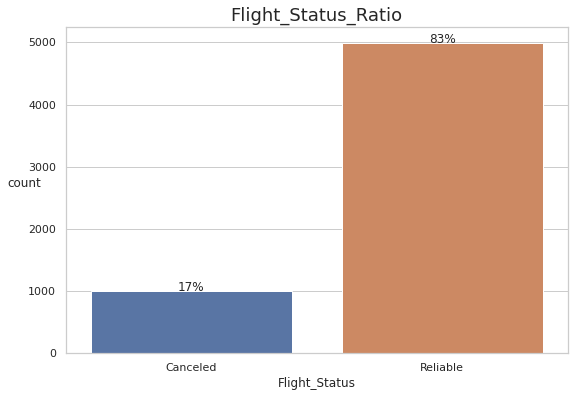

In [1271]:
#Visualization the canceled flight vs non-canceled flight
sns.set(style="whitegrid")
plt.figure(figsize=(9,6))
total = float(len(df))
ax = sns.countplot(x='Flight_Status', data=df)
plt.title('Flight_Status_Ratio', fontsize=18)
plt.ylabel('count', size = 12, rotation = 0)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height() 
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

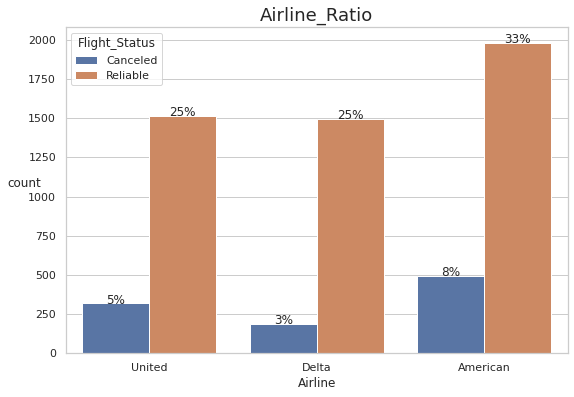

In [1272]:
#Visualization of the Airlines and flights
sns.set(style="whitegrid")
plt.figure(figsize=(9,6))
total = float(len(df))
ax = sns.countplot(x='Airline', hue="Flight_Status", data=df)
plt.title('Airline_Ratio', fontsize=18)
plt.ylabel('count', size = 12, rotation = 0)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height() 
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Text(0, 0.5, 'count')

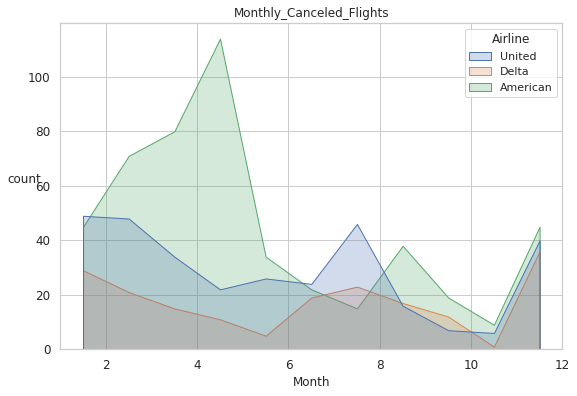

In [1273]:
#Delta airline is had the least amount of canceled flights, Let me dive deep into canceled flgihts per month
canceled = df[df['Flight_Status']=='Canceled']
plt.figure(figsize=(9,6))
sns.histplot(data=canceled, x="Month", hue="Airline", element="poly").set(title='Monthly_Canceled_Flights')
plt.xticks(size=12)
plt.xlabel('Month', size = 12)
plt.yticks(size=12)
plt.ylabel('count', size = 12, rotation = 0)

Text(0, 0.5, 'count')

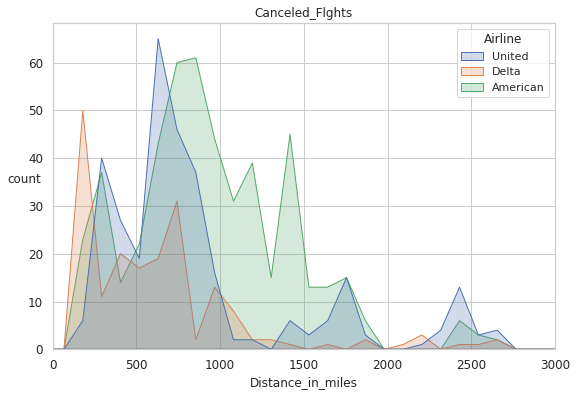

In [1274]:
#Distince and canceled flights
plt.figure(figsize=(9,6))
plt.xlim(0, 3000)
sns.histplot(data=canceled, x="Distance", hue="Airline", element='poly').set(title='Canceled_Flghts')
plt.xticks(size=12)
plt.xlabel('Distance_in_miles', size = 12)
plt.yticks(size=12)
plt.ylabel('count', size = 12, rotation = 0)

Text(0, 0.5, 'count')

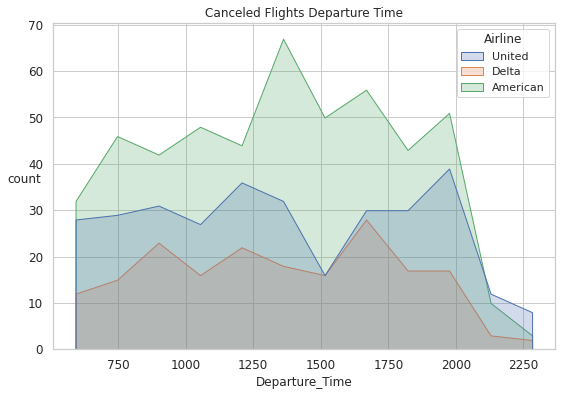

In [1275]:
#DepartureTime and canceled flights
plt.figure(figsize=(9,6))
sns.histplot(data=canceled, x="DepartureTime", hue="Airline", element='poly').set(title='Canceled Flights Departure Time')
plt.xticks(size=12)
plt.xlabel('Departure_Time', size = 12)
plt.yticks(size=12)
plt.ylabel('count', size = 12, rotation = 0)

In [1276]:
#Verify data types before implementing predictive models
df.dtypes

Flight_Status       object
Month               int64 
DepartureTime       int64 
Airline             object
SchedElapsedTime    int64 
ArrDelay            int64 
DepDelay            int64 
Distance            int64 
dtype: object

In [1277]:
#Replace "Airline" values into numerical value
df['Airline'].replace(to_replace = ['United', 'Delta', 'American'], value =['2','3','4'],inplace=True)
#convert Airline into int data type
df["Airline"] = df["Airline"].astype(int)

In [1278]:
#Encode the Target Valuable : Flight_Status
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label=le.fit_transform(df['Flight_Status'])

In [1279]:
label

array([0, 0, 0, ..., 1, 1, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


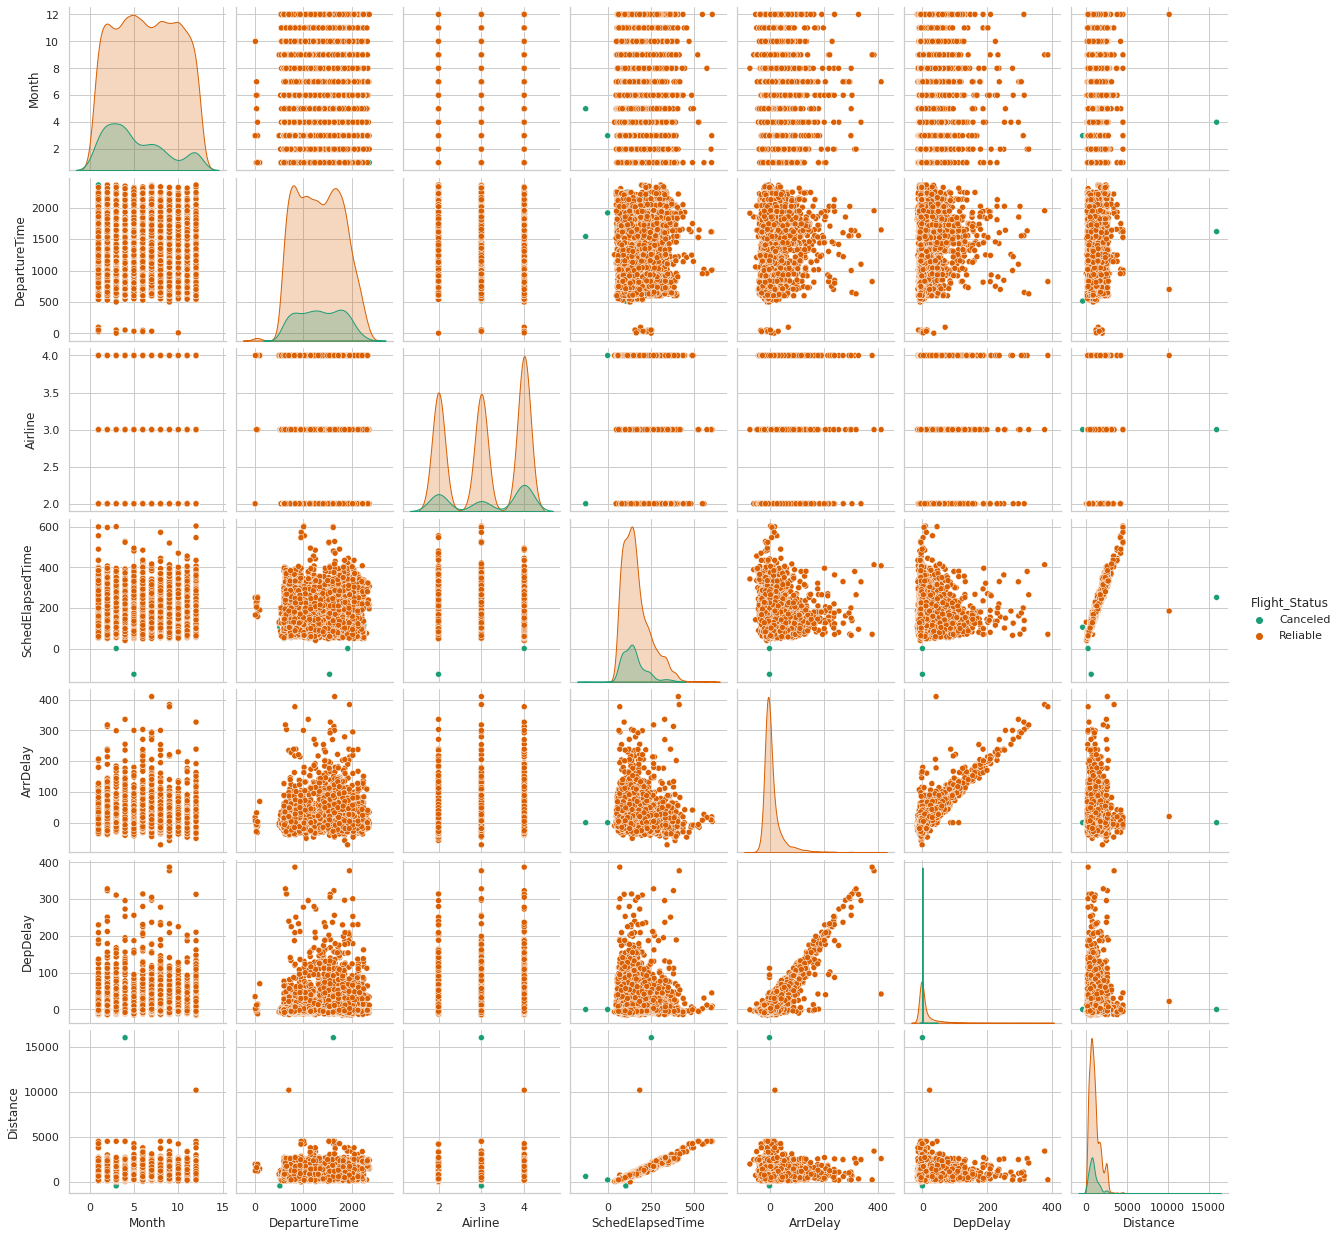

In [1280]:
#Create the pair plot
sns.pairplot(df.iloc[:,0:8], hue ='Flight_Status', palette='Dark2')

In [1281]:
#Drop unwanted columns - 'ArrDelay'and 'DepDelay', as these two columns would not be known before actual flying day, 'ScheduleElapsedTime' highly correlates with Distance
df.drop(['ArrDelay', 'DepDelay','SchedElapsedTime'], axis=1,inplace=True)

In [1282]:
#Print the first 5 rows of new data
df.head(5)

,Flight_Status,Month,DepartureTime,Airline,Distance
0,Canceled,12,814,2,679
1,Canceled,12,830,3,214
2,Canceled,1,1835,2,1605
3,Canceled,4,1730,4,235
4,Canceled,7,1442,2,413


In [1283]:
#Get the coorelation of the columns
df.iloc[:,0:5].corr()

,Month,DepartureTime,Airline,Distance
Month,1.000000,-0.008793,-0.008122,-0.016371
DepartureTime,-0.008793,1.000000,-0.009044,-0.017320
Airline,-0.008122,-0.009044,1.000000,-0.001836
Distance,-0.016371,-0.017320,-0.001836,1.000000


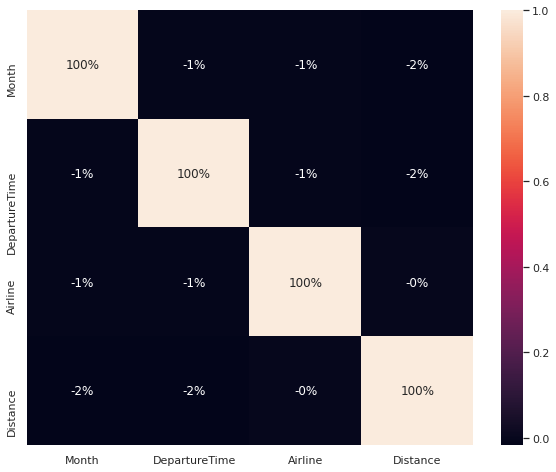

In [1284]:
#Visualiza the coorelation
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:,0:6].corr(), annot=True, fmt='.0%')

In [1285]:
#Split the data set into independent (X) and depedent (Y) data sets
X = df.iloc[:,1:5].values
Y = df.iloc[:,0].values

In [1287]:
#Split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25 , random_state = 0)

In [1288]:
#Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [1289]:
#To prevent overfitting, K Fold validation will be implemented, k=4 since there are not so many records from this training set.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold_validation = KFold(4)

In [1290]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
result1 = cross_val_score(tree,X_train, Y_train,cv=kfold_validation)
print(result1)
print(np.mean(result1))

[0.74466192 0.73754448 0.73309609 0.72508897]
0.7350978647686832


In [1291]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
result2 = cross_val_score(forest,X_train, Y_train,cv=kfold_validation)
print(result2)
print(np.mean(result2))

[0.81227758 0.79092527 0.80871886 0.79448399]
0.8016014234875445


In [1292]:
#Create a function for models
def models(X_train, Y_train):


  #Decision Tree Classifier
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy' , random_state=0)
  tree.fit(X_train,Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train,Y_train)

  #Print the model accuracy on the training data
  print('[1]Decision Tree Classifier Training Accuracy', tree.score(X_train,Y_train))
  print('[2]Random Forest Classifier Training Accuracy', forest.score(X_train,Y_train))

  return tree, forest

In [1293]:
#Get models' accuracy rate for training data set
model = models(X_train, Y_train)

[1]Decision Tree Classifier Training Accuracy 0.9897686832740213
[2]Random Forest Classifier Training Accuracy 0.9788701067615658


In [1294]:
#Test models accuracy on test data on confusion metrix
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
  print('Model' ,i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy = ', (TP+TN)/(TP+TN+FN+FP))
  print()

Model 0
[[  57  188]
 [ 207 1047]]
Testing Accuracy =  0.7364909939959974

Model 1
[[  42  203]
 [ 112 1142]]
Testing Accuracy =  0.789859906604403



In [1295]:
#Another way to get metrics for models on test data sets
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(model) ):
  print('Model' ,i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test), normalize=True, sample_weight=None))
  print()

Model 0
              precision    recall  f1-score   support

    Canceled       0.22      0.23      0.22       245
    Reliable       0.85      0.83      0.84      1254

    accuracy                           0.74      1499
   macro avg       0.53      0.53      0.53      1499
weighted avg       0.74      0.74      0.74      1499

0.7364909939959974

Model 1
              precision    recall  f1-score   support

    Canceled       0.27      0.17      0.21       245
    Reliable       0.85      0.91      0.88      1254

    accuracy                           0.79      1499
   macro avg       0.56      0.54      0.54      1499
weighted avg       0.75      0.79      0.77      1499

0.789859906604403



In [1316]:
#Since Random Forest Classifier was more accurate for test data set, we create a function on Random Forest Classifier Model to predict future flights:
function = model[1].predict(X_test)
print(function)

#NA.Canceled = NA.Canceled.astype(str)
#NA.UniqueCarrier = NA.UniqueCarrier.astype(str)
#NA.SchedElapsedTime = NA.SchedElapsedTime.astype(int)
#NA.ArrDelay = NA.ArrDelay.astype(int)
#NA.Distance = NA.Distance.astype(int)

#NA.rename(columns = {'Canceled' : 'Flight_Status', 'UniqueCarrier' : 'Airline'}, inplace = True)
#NA['Flight_Status'].replace(to_replace = ['1.0', '0.0'], value =['Canceled','Reliable'], inplace = True)
#NA['Airline'].replace(to_replace = ['UA', 'DL', 'AA'], value =['United','Delta', 'American'],inplace = True)

#NA['Airline'].replace(to_replace = ['United', 'Delta', 'American'], value =['2','3','4'],inplace=True)
#NA["Airline"] = df["Airline"].astype(int)

#le3 = LabelEncoder()
#label3=le3.fit_transform(Y_test['Flight_Status'])

#NA.drop(['ArrDelay', 'DepDelay','SchedElapsedTime'], axis=1,inplace=True)
#NA = sc.fit_transform(NA)
#print(NA)
#list(le.inverse_transform(df['Flight_Status']))
#inv =le.inverse_transform(label)
#print(inv)
#function = model[1].predict(Y_test)
##prediction['Flight_Status'] = le.inverse_transform(future_flight1)-1
#print(function)
##df['Flight_Status'] = LabelEncoder().fit_transform(df['Flight_Status'])
##list(le.inverse_transform(df['Flight_Status']))
#inv =le.inverse_transform(label)
#print(inv)
#future_flight1 = [12, 850, 2, 1688]
#X_f1 = sc.fit_transform(future_flight1)
#function = model[1].predict(X_f1)
#print(function)

['Reliable' 'Canceled' 'Canceled' ... 'Reliable' 'Canceled' 'Reliable']
